In [428]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [429]:
warnings.filterwarnings('ignore')

In [430]:
data = pd.read_csv("/content/INFY.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [431]:
data.drop(['Date'], axis=1, inplace=True)

In [432]:
print(data.head())
print(data.shape)
print(data.columns)

       Symbol Series  Prev Close      Open      High       Low      Last  \
0  INFOSYSTCH     EQ    14467.75  15625.00  15625.20  15625.00  15625.20   
1  INFOSYSTCH     EQ    15625.20  16800.00  16875.25  16253.00  16875.25   
2  INFOSYSTCH     EQ    16855.90  15701.00  16250.00  15507.45  15507.45   
3  INFOSYSTCH     EQ    15507.45  15256.65  15300.00  14266.85  14266.85   
4  INFOSYSTCH     EQ    14266.85  13125.50  13125.50  13125.50  13125.50   

      Close      VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  15625.20  15625.18    5137  8.026657e+12     NaN                 NaN   
1  16855.90  16646.38   56186  9.352937e+13     NaN                 NaN   
2  15507.45  15786.38  164605  2.598516e+14     NaN                 NaN   
3  14266.85  14462.82   81997  1.185908e+14     NaN                 NaN   
4  13125.50  13125.50    7589  9.960942e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

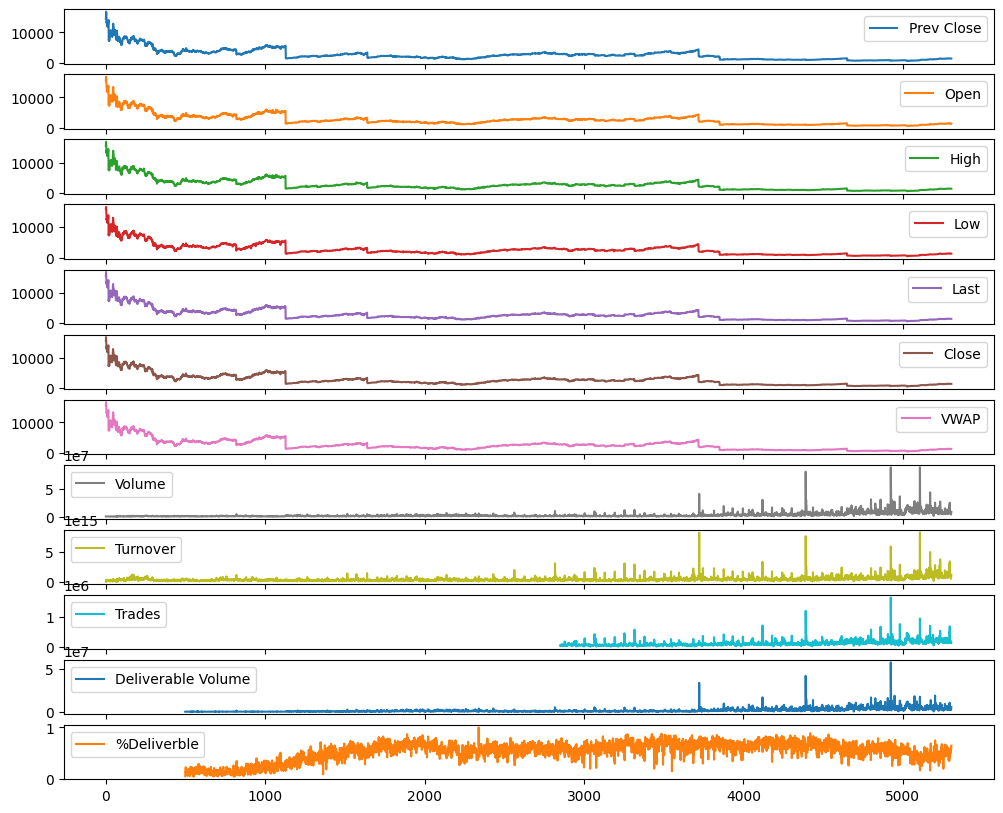

Symbol                   2
Series                   1
Prev Close            5130
Open                  3915
High                  4393
Low                   4591
Last                  4359
Close                 5130
VWAP                  5260
Volume                5300
Turnover              5306
Trades                2441
Deliverable Volume    4793
%Deliverble           3205
dtype: int64

In [433]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [434]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


          Symbol Series  Prev Close      Open      High       Low      Last  \
0     INFOSYSTCH     EQ    14467.75  15625.00  15625.20  15625.00  15625.20   
1     INFOSYSTCH     EQ    15625.20  16800.00  16875.25  16253.00  16875.25   
2     INFOSYSTCH     EQ    16855.90  15701.00  16250.00  15507.45  15507.45   
3     INFOSYSTCH     EQ    15507.45  15256.65  15300.00  14266.85  14266.85   
4     INFOSYSTCH     EQ    14266.85  13125.50  13125.50  13125.50  13125.50   
...          ...    ...         ...       ...       ...       ...       ...   
5301        INFY     EQ     1333.80   1332.25   1351.30   1321.00   1345.00   
5302        INFY     EQ     1343.55   1346.00   1353.00   1340.15   1347.50   
5303        INFY     EQ     1348.50   1358.00   1359.50   1344.60   1355.80   
5304        INFY     EQ     1356.00   1368.00   1369.00   1351.40   1356.00   
5305        INFY     EQ     1356.35   1346.30   1373.90   1345.90   1348.60   

         Close      VWAP   Volume      Turnover    

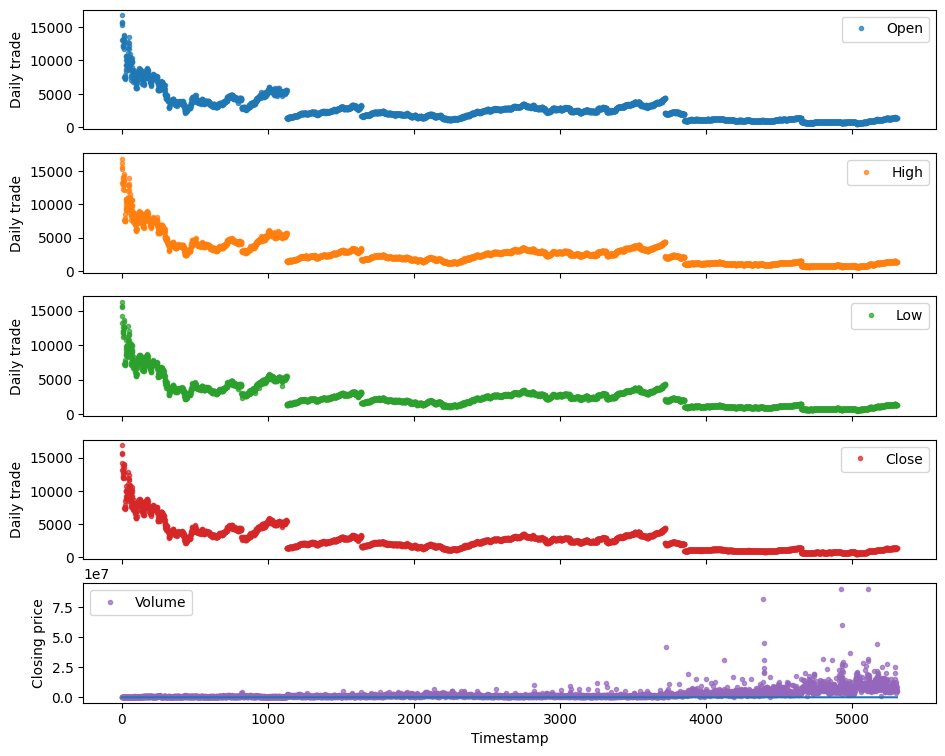

In [435]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [436]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

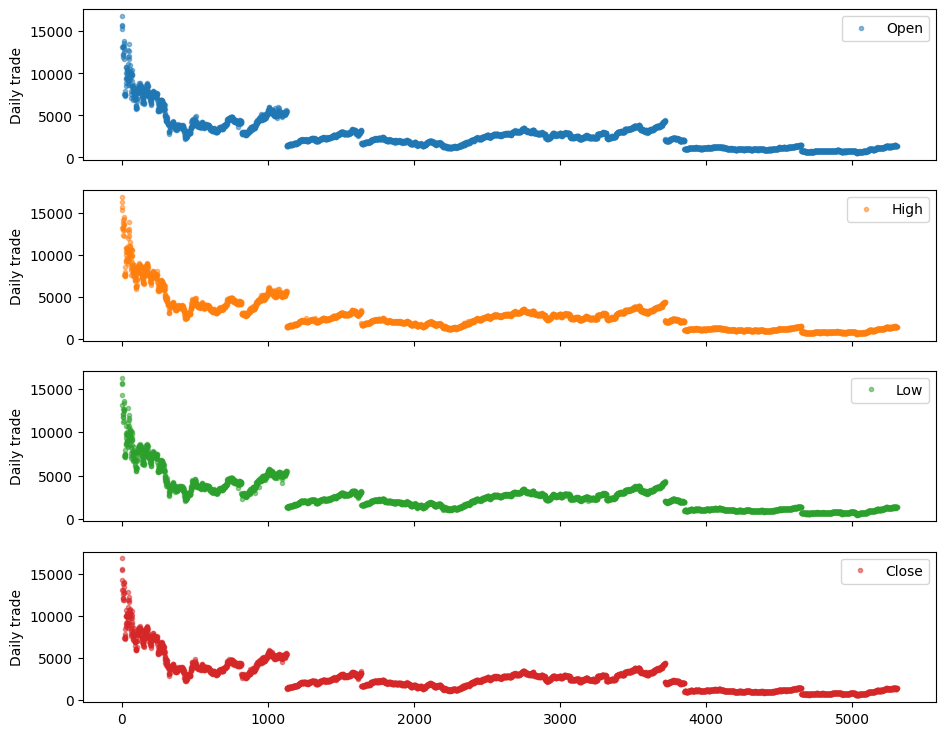

In [437]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

          Symbol Series  Prev Close      Open      High       Low      Last  \
0     INFOSYSTCH     EQ    14467.75  15625.00  15625.20  15625.00  15625.20   
1     INFOSYSTCH     EQ    15625.20  16800.00  16875.25  16253.00  16875.25   
2     INFOSYSTCH     EQ    16855.90  15701.00  16250.00  15507.45  15507.45   
3     INFOSYSTCH     EQ    15507.45  15256.65  15300.00  14266.85  14266.85   
4     INFOSYSTCH     EQ    14266.85  13125.50  13125.50  13125.50  13125.50   
...          ...    ...         ...       ...       ...       ...       ...   
5301        INFY     EQ     1333.80   1332.25   1351.30   1321.00   1345.00   
5302        INFY     EQ     1343.55   1346.00   1353.00   1340.15   1347.50   
5303        INFY     EQ     1348.50   1358.00   1359.50   1344.60   1355.80   
5304        INFY     EQ     1356.00   1368.00   1369.00   1351.40   1356.00   
5305        INFY     EQ     1356.35   1346.30   1373.90   1345.90   1348.60   

         Close      VWAP   Volume      Turnover    

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,2.584357e+03,1.796807e+03,5.264500e+02,1.216062e+03,2.265675e+03,3.170562e+03,1.685590e+04
Open,5306.0,2.584665e+03,1.796732e+03,5.092500e+02,1.213675e+03,2.265000e+03,3.174762e+03,1.680000e+04
High,5306.0,2.626204e+03,1.842171e+03,5.580000e+02,1.233675e+03,2.294300e+03,3.210038e+03,1.687525e+04
Low,5306.0,2.539065e+03,1.743052e+03,5.092500e+02,1.197925e+03,2.232475e+03,3.124575e+03,1.625300e+04
Last,5306.0,2.581678e+03,1.789259e+03,5.291500e+02,1.215750e+03,2.263275e+03,3.170750e+03,1.687525e+04
Close,5306.0,2.581885e+03,1.789463e+03,5.264500e+02,1.216062e+03,2.265575e+03,3.169350e+03,1.685590e+04
VWAP,5306.0,2.582750e+03,1.792981e+03,5.313300e+02,1.214648e+03,2.262210e+03,3.168457e+03,1.664638e+04
Volume,5306.0,2.622813e+06,4.202984e+06,3.291000e+03,7.166842e+05,1.210798e+06,2.784006e+06,9.043339e+07
Turnover,5306.0,3.855758e+14,3.808224e+14,2.933192e+12,2.065910e+14,2.911119e+14,4.335687e+14,8.323905e+15
Trades,2456.0,1.118490e+05,9.020307e+04,1.350000e+03,5.922600e+04,9.025650e+04,1.354770e+05,1.643015e+06


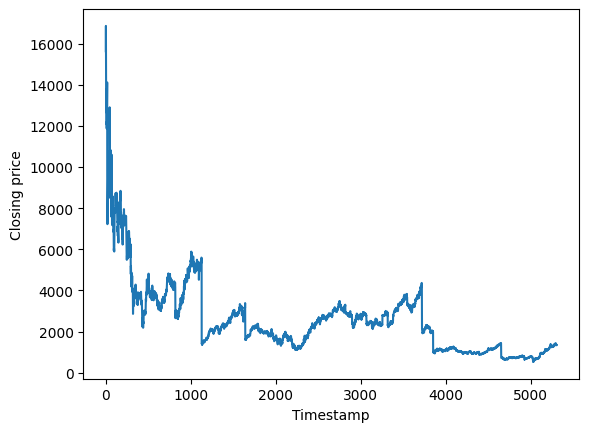

In [438]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [439]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [440]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 13ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0907 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0510
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0372 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0399
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0297 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0315
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0268 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0278
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0254 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0245
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0239 - val_loss: 0.0016 - val_mse: 0.0016 - val_mae: 0.0223
Epoch 7/100
66/66 [==

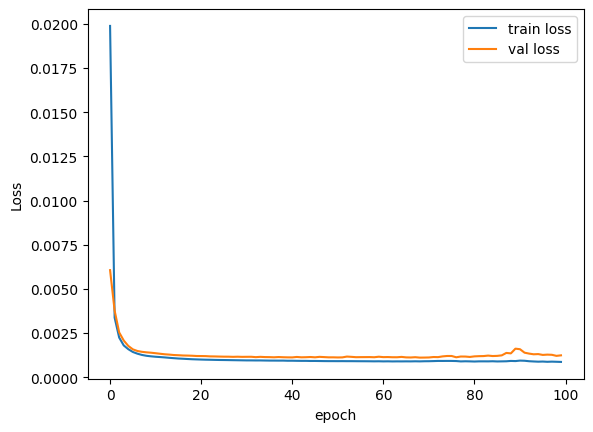

In [441]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

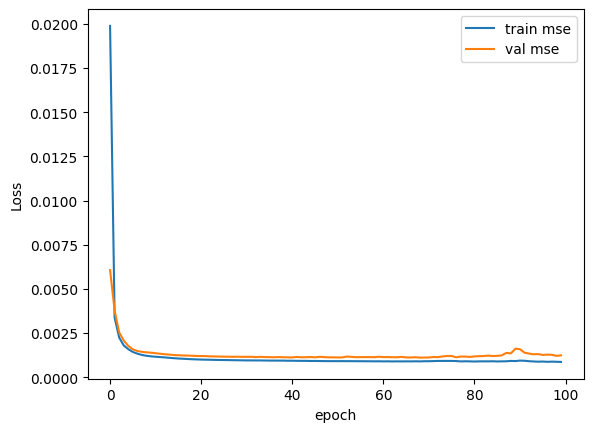

In [442]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

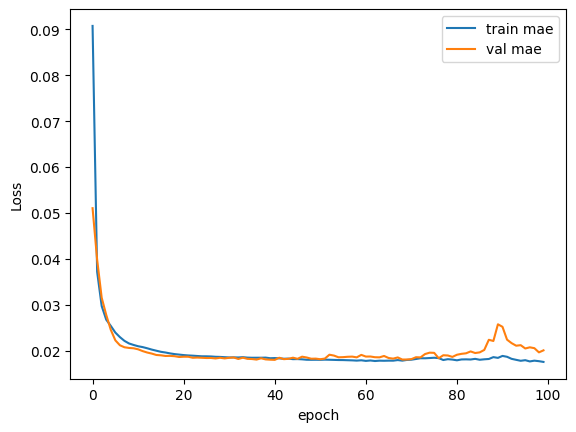

In [443]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_33 (LSTM)              (None, 32)                6272      
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 activation_48 (Activation)  (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 activation_49 (Activation)  (None, 64)              

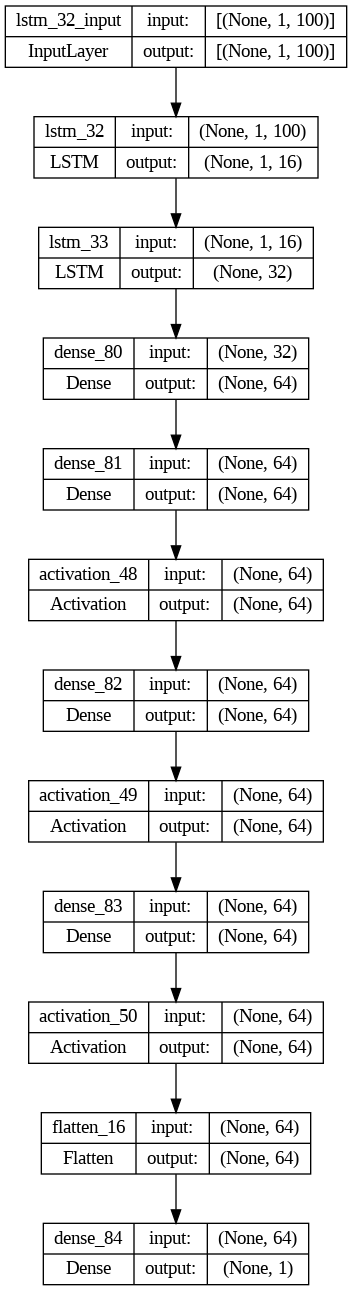

In [444]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [445]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0201    


[0.001234960975125432, 0.001234960975125432, 0.020075419917702675]

In [446]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.983309
R2 Score: 0.982257
Max Error: 0.610621


33/33 [==============================] - 0s 1ms/step


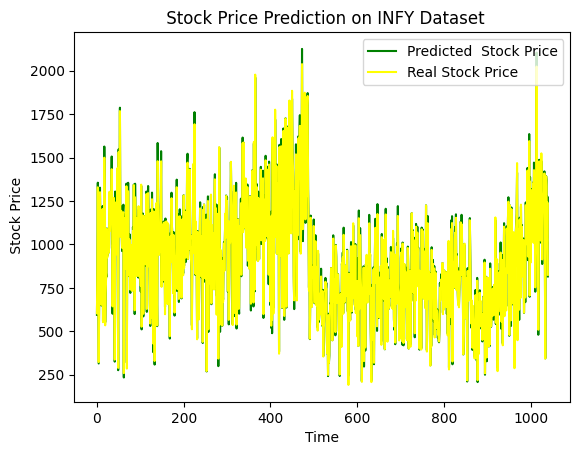

In [447]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on INFY Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

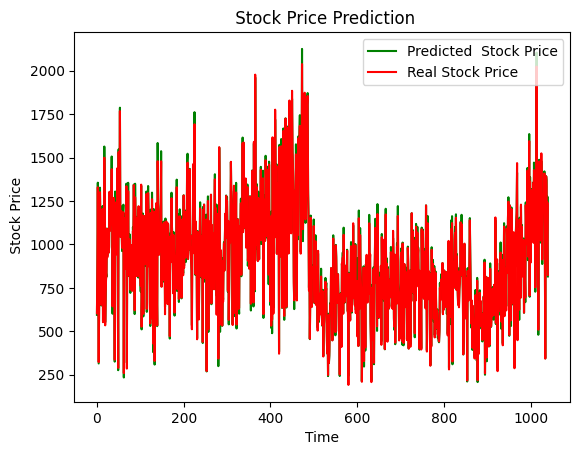

In [448]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [449]:
predicted

array([[ 594.2597 ],
       [ 879.20245],
       [1355.2915 ],
       ...,
       [1035.2073 ],
       [1274.7908 ],
       [ 815.32214]], dtype=float32)

In [450]:
test_label

array([[ 603.7559317 ],
       [ 893.14912281],
       [1328.86647925],
       ...,
       [1016.871044  ],
       [1240.97943734],
       [ 824.77245702]])

In [451]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       603.755932       594.259705
1       893.149123       879.202454
2      1328.866479      1355.291504
3       799.208810       793.790222
4       322.396171       314.322083
...            ...              ...
1036   1391.494119      1392.940186
1037   1334.377429      1370.201904
1038   1016.871044      1035.207275
1039   1240.979437      1274.790771
1040    824.772457       815.322144

[1041 rows x 2 columns]


In [452]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 603.7559317022692  | 594.2597045898438  |
|  1   | 893.1491228070175  | 879.2024536132812  |
|  2   | 1328.8664792479067 |  1355.29150390625  |
|  3   | 799.2088095238095  | 793.7902221679688  |
|  4   | 322.3961713656256  | 314.32208251953125 |
|  5   | 607.2554655107426  | 648.4971923828125  |
|  6   | 1036.194625919782  | 1038.264892578125  |
|  7   | 1300.580931640128  | 1326.6617431640625 |
|  8   | 1068.2853007528327 | 1059.8988037109375 |
|  9   | 1089.9144667952603 | 1122.2808837890625 |
|  10  | 652.1288318482791  | 648.1370239257812  |
|  11  |  1045.77065351418  | 1072.0926513671875 |
|  12  | 792.4485257007368  |  802.68701171875   |
|  13  | 1203.8501483679527 | 1221.113525390625  |
|  14  | 551.8212390094378  | 558.0574951171875  |
|  15  | 1110.2994657638792 | 1106.0277099609375 |
|  16  | 600.6157796689674  |  

In [453]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_33 (LSTM)              (None, 32)                6272      
                                                                 
 dense_80 (Dense)            (None, 64)                2112      
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 activation_48 (Activation)  (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 activation_49 (Activation)  (None, 64)              

In [454]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))